<a href="https://colab.research.google.com/github/Storm00212/Data-manipulation-using-python/blob/main/Skewness_and_kurtosis_for_grouped_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

In [2]:
classes = [(0,10), (10,20), (20,30), (30,40), (40,50)]
freqs = [5, 12, 20, 10, 3]

midpoints = [(L+U)/2 for (L,U) in classes]

# Convert to NumPy arrays for easier math
midpoints = np.array(midpoints)
freqs = np.array(freqs)


In [3]:
N = freqs.sum()
mean = np.sum(freqs * midpoints) / N
print(f"Estimated Mean = {mean:.4f}")

Estimated Mean = 23.8000


In [4]:
deviations = midpoints - mean
print(f"Deviations from mean:\n{deviations}")

Deviations from mean:
[-18.8  -8.8   1.2  11.2  21.2]


In [6]:
f_d2 = freqs * deviations**2
f_d3 = freqs * deviations**3
f_d4 = freqs * deviations**4


In [7]:
# Central moments (population style, divide by N)
mu2 = f_d2.sum() / N
mu3 = f_d3.sum() / N
mu4 = f_d4.sum() / N

print(f"\nSecond central moment (mu2 / variance) = {mu2:.4f}")
print(f"Third central moment (mu3) = {mu3:.4f}")
print(f"Fourth central moment (mu4) = {mu4:.4f}")



Second central moment (mu2 / variance) = 106.5600
Third central moment (mu3) = 25.3440
Fourth central moment (mu4) = 29198.8992


In [8]:
skewness = mu3 / (mu2**1.5)
kurtosis_value = mu4 / (mu2**2)

print(f"\nSkewness = {skewness:.4f}")
print(f"Kurtosis (Pearson, normal=3) = {kurtosis_value:.4f}")



Skewness = 0.0230
Kurtosis (Pearson, normal=3) = 2.5714


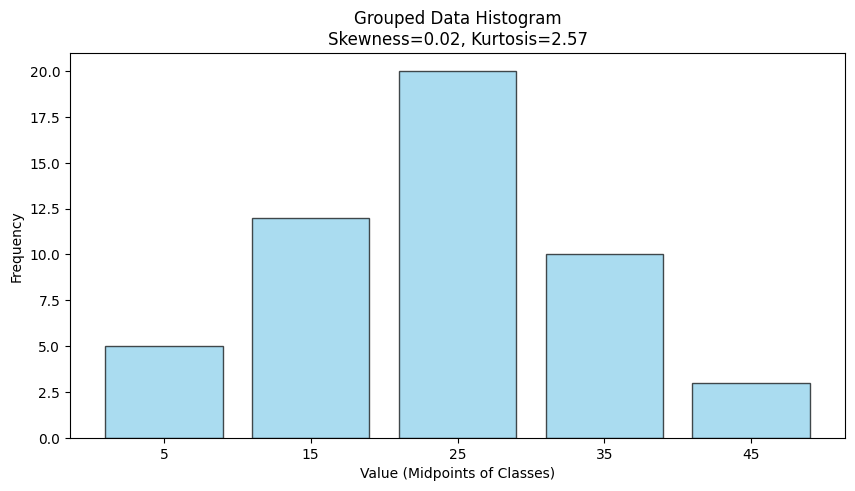

In [9]:
plt.figure(figsize=(10,5))
plt.bar(midpoints, freqs, width=8, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel("Value (Midpoints of Classes)")
plt.ylabel("Frequency")
plt.title(f"Grouped Data Histogram\nSkewness={skewness:.2f}, Kurtosis={kurtosis_value:.2f}")
plt.xticks(midpoints)
plt.show()

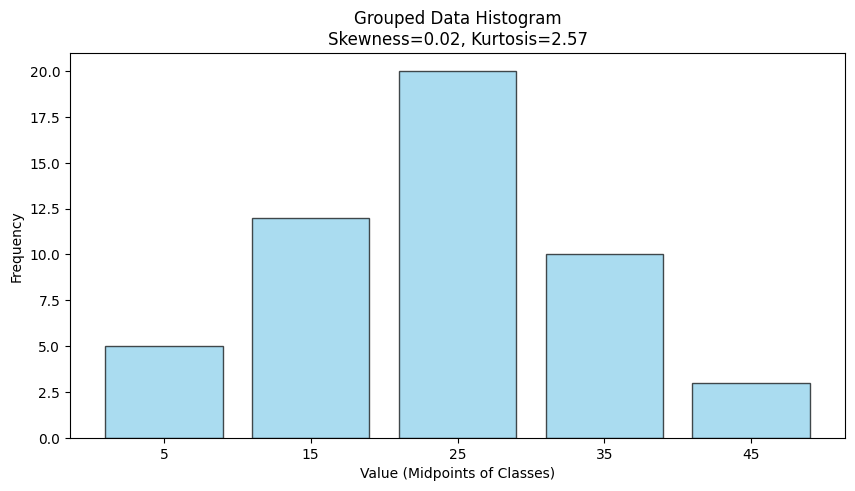

In [10]:
plt.figure(figsize=(10,5))
plt.bar(midpoints, freqs, width=8, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel("Value (Midpoints of Classes)")
plt.ylabel("Frequency")
plt.title(f"Grouped Data Histogram\nSkewness={skewness:.2f}, Kurtosis={kurtosis_value:.2f}")
plt.xticks(midpoints)
plt.show()

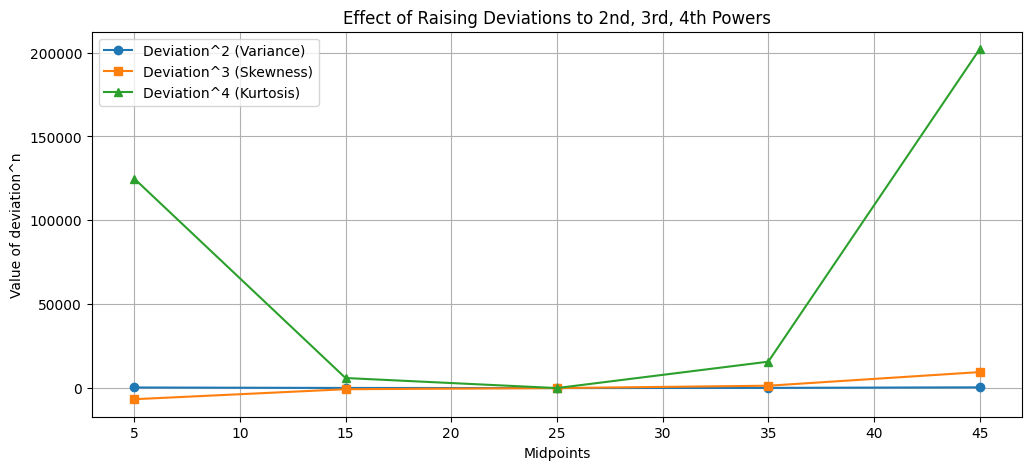

In [11]:
plt.figure(figsize=(12,5))

# Plot deviations raised to different powers
plt.plot(midpoints, deviations**2, 'o-', label='Deviation^2 (Variance)')
plt.plot(midpoints, deviations**3, 's-', label='Deviation^3 (Skewness)')
plt.plot(midpoints, deviations**4, '^-', label='Deviation^4 (Kurtosis)')

plt.xlabel("Midpoints")
plt.ylabel("Value of deviation^n")
plt.title("Effect of Raising Deviations to 2nd, 3rd, 4th Powers")
plt.legend()
plt.grid(True)
plt.show()